In [5]:
from __future__ import print_function
from nltk.metrics import *
s1 = "There are manu similarity measures used in NLTK Package".split()
s2 = "There are manu similarity measures are avaliable in NLTK".split()
print(accuracy(s1,s2))
print(s1)
print(s2)

0.5555555555555556
['There', 'are', 'manu', 'similarity', 'measures', 'used', 'in', 'NLTK', 'Package']
['There', 'are', 'manu', 'similarity', 'measures', 'are', 'avaliable', 'in', 'NLTK']


In [4]:
print(precision(set(s1),set(s2)))

0.875


In [3]:
print(recall(set(s1),set(s2)))

0.7777777777777778


#Exercise 1: 
For the given sentences, apply confusion_report 
to get similarity between sentences. Write your code below 
and the outputs.

In [6]:
from sklearn.metrics import confusion_matrix,classification_report
print(classification_report(s1,s2))

              precision    recall  f1-score   support

        NLTK       0.00      0.00      0.00         1
     Package       0.00      0.00      0.00         1
       There       1.00      1.00      1.00         1
         are       0.50      1.00      0.67         1
   avaliable       0.00      0.00      0.00         0
          in       0.00      0.00      0.00         1
        manu       1.00      1.00      1.00         1
    measures       1.00      1.00      1.00         1
  similarity       1.00      1.00      1.00         1
        used       0.00      0.00      0.00         1

    accuracy                           0.56         9
   macro avg       0.45      0.50      0.47         9
weighted avg       0.50      0.56      0.52         9



C:\Users\KT3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KT3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KT3\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\KT3\anaconda3\lib\site-packages\sklearn\metrics\_classificat

{'Package', 'in', 'measures', 'NLTK', 'avaliable', 'are', 'manu', 'There', 'used', 'similarity'}


<AxesSubplot:>

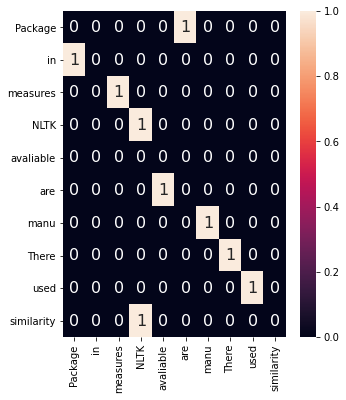

In [7]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt
array = confusion_matrix(s1,s2)

setA=set(s1)
setB=set(s2)
dic = setA.union(setB)
print(dic)
df = pd.DataFrame(array,index = dic , columns=dic)
plt.figure(figsize=(5,6))
sn.heatmap(df,annot=True,annot_kws={"size":16})


In [13]:
from __future__ import print_function
def _edit_dist_init(len1,len2):
    lev = []
    for i in range(len1):
        lev.append([0]*len2)
    for i in range(len1):
        lev[i][0]=i
    for j in range(len2):
        lev[0][j]=j
    return lev

def _edit_dist_step(lev,i,j,s1,s2,transpositions=False):
    c1=s1[i-1]
    c2 =s2[j-1]
    a =lev[i-1][j] +1
    b =lev[i][j -1]+1
    c =lev[i-1][j-1]+(c1!=c2)
    d =c+1 
    if transpositions and i>1 and j>1:
       if s1[i -2]==c2 and s2[j -2]==c1:
          d =lev[i-2][j-2]+1
       lev[i][j] =min(a,b,c,d)

def edit_distance(s1, s2, transpositions=False):
  len1 = len(s1)
  len2 = len(s2)
  lev = _edit_dist_init(len1 + 1, len2 + 1)
  for i in range(len1):
    for j in range(len2):
      _edit_dist_step(lev, i + 1, j + 1, s1, s2,transpositions=transpositions)
  return lev[len1][len2]

edit_distance("relate","relation")

0